In [ ]:
from RewardModel import RewardModelTrainer, SentencePairDataset
from RewardModel import RoBERTaRewardModel
from transformers import RobertaTokenizer
from torch.utils.data import DataLoader
import json


# Example data: List of tuples with (context, good example, bad example)
# with open("data.json", "r") as f:
#     data = json.load(f)["annotations"]
#     data = [(d["data"]["prompt"], d["data"]["answer1"], d["data"]["answer2"]) for d in data]

data = [
    ("The sun is shining", "It is a bright day", "It is raining"),
    ("The sun is shining", "It is a bright day", "It is raining"),
]


# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-large')

# Create dataset and dataloader
dataset = SentencePairDataset(data, tokenizer, max_length=16)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = RoBERTaRewardModel()
tok_good = tokenizer("The sun is shining </s> It is a bright day", return_tensors="pt")
tok_bad = tokenizer("The sun is shining </s> It is raining", return_tensors="pt")

print("good", model(**tok_good))
print("bad", model(**tok_bad))

rmt = RewardModelTrainer(model, dataloader, 15, 0.1)

losses, eval_diffs = rmt.train()

print("good", rmt.model(**tok_good))
print("bad", rmt.model(**tok_bad))

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


good_input_ids None
bad None
normal inputids tensor([[    0,   133,  3778,    16, 21003,  1437,     2,    85,    16,    10,
          4520,   183,     2]])
normal roberta tensor([[[-0.0283,  0.1016,  0.0375,  ..., -0.0608,  0.0396,  0.0961],
         [ 0.0133,  0.0375, -0.1433,  ...,  0.0031, -0.0195, -0.0122],
         [-0.1407, -0.0367, -0.3086,  ..., -0.2916, -0.1019, -0.0125],
         ...,
         [ 0.1331,  0.0226, -0.3368,  ..., -0.0353, -0.0508,  0.1350],
         [-0.0361, -0.0941, -0.2944,  ...,  0.0300, -0.1334, -0.1268],
         [ 0.0047,  0.1055,  0.0533,  ..., -0.0881,  0.0217,  0.0682]]],
       grad_fn=<NativeLayerNormBackward0>)
normal reward tensor([[0.7483, 0.8770, 0.8209, 0.8699, 0.7633, 0.8051, 0.7099, 0.6967, 0.8213,
         0.8070, 0.7961, 0.8317, 0.7529]], grad_fn=<SqueezeBackward1>)
good tensor(0.7483, grad_fn=<SqueezeBackward1>)
good_input_ids None
bad None
normal inputids tensor([[    0,   133,  3778,    16, 21003,  1437,     2,    85,    16, 31832,
      

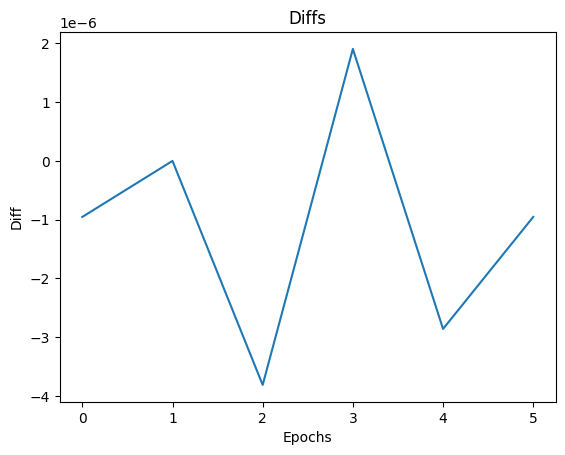

In [ ]:
from matplotlib import pyplot as plt

plt.plot([i.detach().numpy() for i in eval_diffs])

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Diff')
plt.title('Diffs')

plt.show()

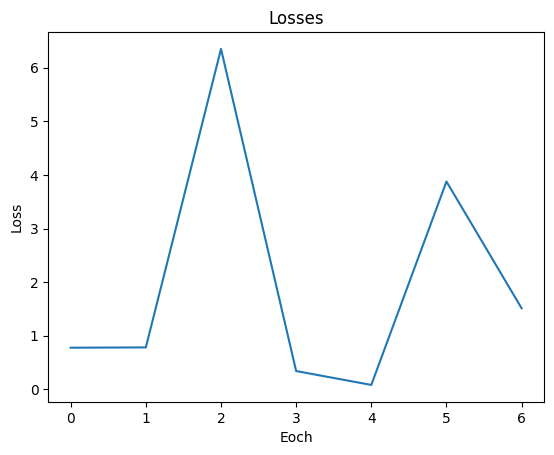

In [ ]:

plt.plot(losses)

# Add labels and title
plt.xlabel('Eoch')
plt.ylabel('Loss')
plt.title('Losses')

plt.show()

In [29]:
import torch
torch.log(torch.sigmoid(torch.tensor(100000)))

tensor(0.)